In [1]:
#First, we need to import the packages we will be using.
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import seaborn as sns

In [6]:
from sklearn.preprocessing import scale

In [7]:
from sklearn.decomposition import PCA

In [8]:
#Loading the Data Set.
med_df = pd.read_csv('/Users/CourtneyTaylor/Downloads/medical_raw_data.csv')

EXAMINING THE DATA SET

In [9]:
#Displaying the Medical Data Set.
med_df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3


In [10]:
#Describing and examining the Data Set.
#Here, we can view the unique statistics of the data set.
med_df.describe()

,Unnamed: 0,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,7412.000000,7586.000000,7536.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.098219,53.295676,40484.438268,19.412675,...,5891.538261,12934.528586,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.155427,20.659182,28664.861050,6.723277,...,3377.558136,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,1.00000,610.000000,17.967190,-174.209690,0.000000,0.000000,18.000000,154.080000,9.519012,...,1256.751699,3125.702716,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,35.000000,19450.792500,16.513171,...,3253.239465,7986.487642,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33942.280000,18.080560,...,5852.250564,11573.979365,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54075.235000,19.789740,...,7614.989701,15626.491033,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.130000,53.019124,...,21524.224210,30566.073130,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [11]:
#Displaying data types and counts
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

In [12]:
#There are two types of data in this data frame: Numerical and Categorical.
#Let's first look at the numerical data
med_df_num = med_df.select_dtypes(include='number')
med_df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Zip                 10000 non-null  int64  
 3   Lat                 10000 non-null  float64
 4   Lng                 10000 non-null  float64
 5   Population          10000 non-null  int64  
 6   Children            7412 non-null   float64
 7   Age                 7586 non-null   float64
 8   Income              7536 non-null   float64
 9   VitD_levels         10000 non-null  float64
 10  Doc_visits          10000 non-null  int64  
 11  Full_meals_eaten    10000 non-null  int64  
 12  VitD_supp           10000 non-null  int64  
 13  Overweight          9018 non-null   float64
 14  Anxiety             9016 non-null   float64
 15  Initial_days        8944 non-null   float64
 16  Total

In [13]:
#Next, we will look at Categorical data
med_df_cat = med_df.select_dtypes(include='object')
med_df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer_id         10000 non-null  object
 1   Interaction         10000 non-null  object
 2   UID                 10000 non-null  object
 3   City                10000 non-null  object
 4   State               10000 non-null  object
 5   County              10000 non-null  object
 6   Area                10000 non-null  object
 7   Timezone            10000 non-null  object
 8   Job                 10000 non-null  object
 9   Education           10000 non-null  object
 10  Employment          10000 non-null  object
 11  Marital             10000 non-null  object
 12  Gender              10000 non-null  object
 13  ReAdmis             10000 non-null  object
 14  Soft_drink          7533 non-null   object
 15  Initial_admin       10000 non-null  object
 16  HighBlood           100

In [14]:
#Next, let's check for duplicates.
med_df.duplicated
print(med_df)

      Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0              1          1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1              2          2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2              3          3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3              4          4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4              5          5     C544523  5885f56b-d6da-43a3-8760-83583af94266   
...          ...        ...         ...                                   ...   
9995        9996       9996     B863060  a25b594d-0328-486f-a9b9-0567eb0f9723   
9996        9997       9997     P712040  70711574-f7b1-4a17-b15f-48c54564b70f   
9997        9998       9998     R778890  1d79569d-8e0f-4180-a207-d67ee4527d26   
9998        9999       9999     E344109  f5a68e69-2a60-409b-a92f-ac0847b27db0   
9999       10000      10000     I569847  bc482c02-f8c9-4423-99de-3db5e62a18d5   

                           

In [15]:
#It shows a duplicate column (Unnamed:0), which is identical to 'CaseOrder'
#We will drop the duplicate column 'Unnamed.'
med_df.drop (columns = {'Unnamed: 0' 
                        },
           inplace=True)
print(med_df)

      CaseOrder Customer_id                           Interaction  \
0             1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1             2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2             3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3             4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4             5     C544523  5885f56b-d6da-43a3-8760-83583af94266   
...         ...         ...                                   ...   
9995       9996     B863060  a25b594d-0328-486f-a9b9-0567eb0f9723   
9996       9997     P712040  70711574-f7b1-4a17-b15f-48c54564b70f   
9997       9998     R778890  1d79569d-8e0f-4180-a207-d67ee4527d26   
9998       9999     E344109  f5a68e69-2a60-409b-a92f-ac0847b27db0   
9999      10000     I569847  bc482c02-f8c9-4423-99de-3db5e62a18d5   

                                   UID          City State        County  \
0     3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan   
1     176354c5eef71

In [16]:
#The "Unnamed" column has been successfully dropped.

<AxesSubplot:>

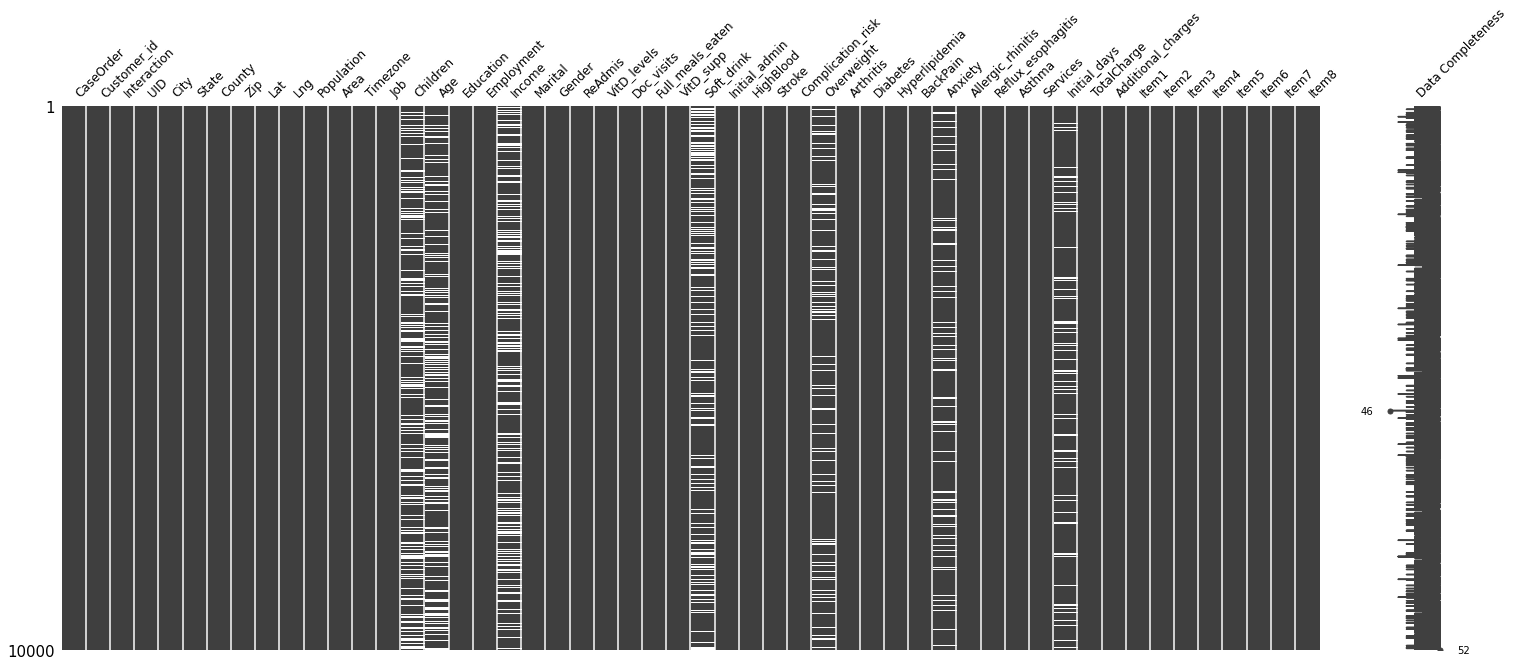

In [17]:
#Next, let's check for missing values.
#First we need to import missingno to visualize the null values. 
import missingno as msno
#We will be using the code below as we are working with more than 50 columns.
msno.matrix(med_df, fontsize = 12, labels=True)

In [18]:
#Let's gather a sum of how many values are missing from each variable.
med_df.isnull().sum()

CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
Anxiety                984
A

In [19]:
#It appears the data set has numerous missing values in multiple variables. 
#The missing values also look like they are not inherently related.
#Children, Age, Income, Soft_drink, Overweight, Anxiety, and Initial_days all have missing values.
#We will be fixing these variables by imputing the median and mean for the numerical columns.
#We will also be imputing the mode for the categorical columns.

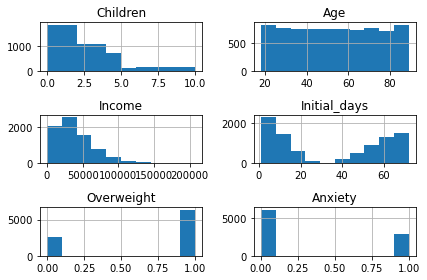

In [20]:
#Let's see the distribution for the numerical data
med_df[['Children', 'Age', 'Income', 'Initial_days', 'Overweight', 'Anxiety']].hist()
plt.savefig('med_df_pyplot.jpg')
plt.tight_layout()

In [21]:
#It looks like 'Children' and 'Income' are positively skewed.
#'Age' appears to have a uniform distribution.
#Lastly,'Initial_days' appear to have a bimodal distribution.

In [22]:
#Let's impute the median for the numerical columns.
med_df['Children'].fillna(med_df['Children'].median(), inplace=True)
med_df['Income'].fillna(med_df['Income'].median(), inplace=True)
med_df['Initial_days'].fillna(med_df['Initial_days'].median(), inplace=True)
med_df['Overweight'].fillna(med_df['Overweight'].median(), inplace=True)
med_df['Anxiety'].fillna(med_df['Anxiety'].median(), inplace=True)
#And, let's check and make sure all of the values were imputing by using the below code.
med_df.isnull().sum()

CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children                 0
Age                   2414
Education                0
Employment               0
Income                   0
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight               0
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
Anxiety                  0
A

In [23]:
med_df['Age'].fillna(med_df['Age'].mean(), inplace=True)
med_df.isnull().sum()

CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children                 0
Age                      0
Education                0
Employment               0
Income                   0
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight               0
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
Anxiety                  0
A

In [24]:
#It looks like all of the numerical data is complete.
#Let's move onto the categorical column that is missing values. 
#Soft_drink is missing values.
#Since it is a categorical variable, we will be using the mode.
med_df['Soft_drink'] = med_df['Soft_drink'].fillna(med_df['Soft_drink'].mode() [0])
#We will also confirming all null values were remedied.
med_df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
Timezone              0
Job                   0
Children              0
Age                   0
Education             0
Employment            0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
VitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days    

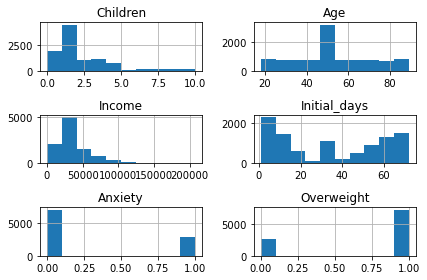

In [25]:
#Now that all null values are treated, let's check the distributions.
med_df[['Children', 'Age', 'Income', 'Initial_days', 'Anxiety', 'Overweight']].hist()
plt.savefig('med_df_pyplot.jpg')
plt.tight_layout()

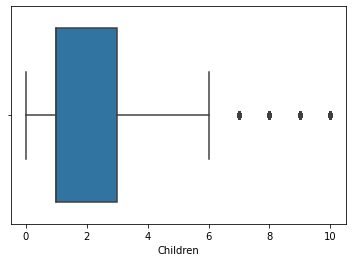

In [26]:
#Now let's tackle the outliers.
#We will be using boxplots to identify outliers.
#Note: Boxplots will only work on numerical data.
boxplot=sns.boxplot(x='Children',data=med_df)

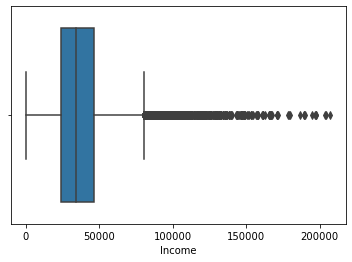

In [27]:
boxplot=sns.boxplot(x='Income',data=med_df)

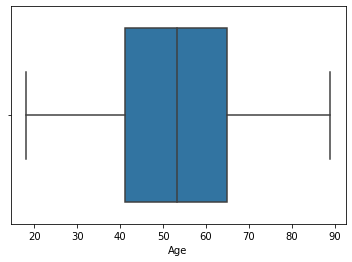

In [28]:
boxplot=sns.boxplot(x='Age',data=med_df)

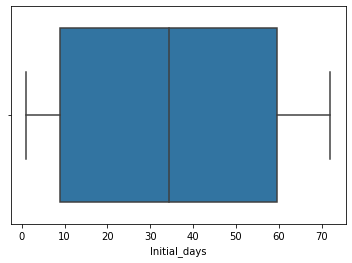

In [29]:
boxplot=sns.boxplot(x='Initial_days',data=med_df)

In [30]:
#So, it looks like 'Children' and 'Income' contain outliers.
#The outliers will remain in the data set as they do not appear to be errors, but legitimate entries.
#Plus, excluding the outliers will remove a large portion of data in the data set.

In [31]:
#Now let's extract the clean data
med_df.to_csv('med_df_clean.csv')

In [32]:
#Let's reload the clean data
med_df = pd.read_csv('med_df_clean.csv',index_col=0)

Principal Component Analysis (PCA)

In [33]:
#Now, let's choose which variables will be included in the PCA.
#NOTE: They must be numeric.
med_df = med_df[['TotalCharge', 'Additional_charges', 'Age', 'Children', 'Income']]
#To assess the result, we will use the code below.
med_df.head()

,TotalCharge,Additional_charges,Age,Children,Income
0,3191.048774,17939.403420,53.0,1.0,86575.93
1,4214.905346,17612.998120,51.0,3.0,46805.99
2,2177.586768,17505.192460,53.0,3.0,14370.14
3,2465.118965,12993.437350,78.0,0.0,39741.49
4,1885.655137,3716.525786,22.0,1.0,1209.56


In [34]:
#To run the PCA, we will be utilizing the scikit learn package we imported at the beginning.
#First we need to normalize the data. 
#We do this because there could have different scales, which may cause large loadings w/ high variance.
med_df_normalized = (med_df - med_df.mean()) / med_df.std()

In [35]:
#Then we select how many components we want extracted.
pca = PCA(n_components = med_df.shape[1])
pca.fit(med_df_normalized)
PCA(n_components=5)

PCA(n_components=5)

In [42]:
#Now, we will call the PCA application that will convert the data set of 5 variables into 5 principal components.
pca.fit(med_df_normalized)
med_df = pd.DataFrame(pca.transform(med_df_normalized),columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [37]:
#Loadings
#These are the correlation coefficients between the rows and columns.
#This measures how strong the relationship is between two variables.
#This will aid in identifying strengths the columns add to the principal components
loadings = pd.DataFrame(pca.components_.T,
                        columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],
                        index=med_df_normalized.columns)
loadings

,PC1,PC2,PC3,PC4,PC5
TotalCharge,0.056283,-0.336226,0.802835,0.488982,-0.011675
Additional_charges,0.706159,0.016971,-0.028052,-0.006668,0.707262
Age,0.705658,0.006787,-0.047640,-0.015214,-0.706753
Children,0.012661,0.604487,0.582785,-0.542875,-0.009151
Income,-0.007623,0.721951,-0.112961,0.682575,-0.007758


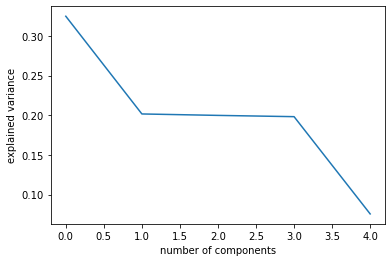

In [38]:
#TotalCharge, Additional_charges, and Age all have the highest coefficients
#Making a Scree Plot
#Explained Variance
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

In [39]:
#Extracting the Eigenvalues
cov_matrix = np.dot(med_df_normalized.T, med_df_normalized) / med_df.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

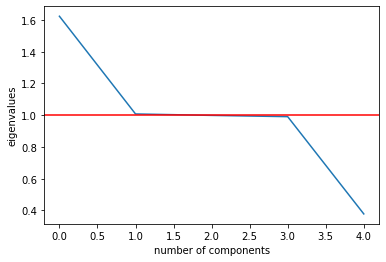

In [40]:
#Scree Plot
#Eigenvalues
#We use the Kaiser rule to retain PCs that have an eigenvalue of >1.
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalues')
plt.axhline(y=1, color="red")
plt.show()

In [41]:
#With that, it is useless using more than 3 components as the eigenvalue is <1 past 3.0 components.
#So we should retain 3 components according to the Kaiser rule and Scree Plot.
#Regarding the coefficients in PC1, "TotalCharge, "Additional_charges," and "Age" have the strongest relationship.
#By thinking logically with PC1, the higher the age, the higher the total and additional costs of medical care.
#In conclusion, according to the Kaiser Rule, we will be focusing on PC1, PC2, PC3.